### High-level process (unknown) of a request-handling process.

There are the following contextual dependencies:
* <i>Receive request</i> is performed by an employee with the <i>Assistant</i> role
* <i>Receive request</i> takes 5 minutes from start to end
* <i>Check completeness</i> is performed by an employee with the <i>Assistant</i> role
* <i>Check completeness</i> takes at most 20 minutes from start to end
* <i>Check completeness</i> changes the attribute <i>isComplete</></i>,
* <i>Inquire about missing information</i> is performed by the <i>Assistant</i> role
* <i>Update request</i> is performed by an employee with the <i>Assistant</i> role
* <i>Update request</i> takes 5 minutes from start to end
* <i>Examine request thoroughly</i> is performed by the <i>Expert</i> role
* <i>Examine request thoroughly</i> takes at most 30 minutes
* <i>Examine request casually</i> is performed by an employee with the <i>Assistant</i> role
* <i>Examine request casually</i> takes at most 10 minutes
* <i>Decide on acceptance</i> is performed by the <i>Manager</i> role
* <i>Decide on acceptance</i> takes at most 20 minutes
* <i>Decide on acceptance</i> changes the attribute <i>isAccepted</i> either to true or false
* <i>Communicate decision</i> is performed by an employee with the <i>Assistant</i> role
* <i>Communicate decision</i> happens at most 1 hour after the decision was made.
    
#### Waiting times
There should be reasonable waiting times between the activities of the high-level process, e.g., 1 - 2 hours between all high-level activities.  
      
<b>Exeptions</b>:
* <i>Check completeness</i> => <i>Inquire about missing information</i> only ca. 20 minutes max.
* <i>Inquire about missing information</i> => <i>Update request</i> longer: 5 hours, with exponential distribution (depends strongly on the requester!)

In [1]:
from pm4py.objects.petri_net.obj import PetriNet, Marking # Objects for constructing a Petri net system.
from pm4py.objects.petri_net.utils import petri_utils

net = PetriNet("HandleRequest_HighLevel")

source = PetriNet.Place("Start")
net.places.add(source)
t_a = PetriNet.Transition("name_0", "Receive request")
net.transitions.add(t_a)
petri_utils.add_arc_from_to(source, t_a, net)

p_1 = PetriNet.Place("p_1")
net.places.add(p_1)
petri_utils.add_arc_from_to(t_a, p_1, net)


t_2 = PetriNet.Transition("name_2", "Check completeness")
net.transitions.add(t_2)
petri_utils.add_arc_from_to(p_1, t_2, net)
p_3 = PetriNet.Place("p_3")
net.places.add(p_3)
petri_utils.add_arc_from_to(t_2, p_3, net)
#Loop back

t_9 = PetriNet.Transition("name_9", "Inquire about missing information")
net.transitions.add(t_9)
petri_utils.add_arc_from_to(p_3, t_9, net)

p_2 = PetriNet.Place("p_2")
net.places.add(p_2)
petri_utils.add_arc_from_to(t_9, p_2, net)

t_1 = PetriNet.Transition("name_1", "Update request")
net.transitions.add(t_1)
petri_utils.add_arc_from_to(p_2, t_1, net)

petri_utils.add_arc_from_to(t_1, p_1, net)

# Examination
t_3 = PetriNet.Transition("name_3", "Examine request thoroughly")
t_4 = PetriNet.Transition("name_4", "Examine request casually")
net.transitions.add(t_3)
net.transitions.add(t_4)
petri_utils.add_arc_from_to(p_3, t_3, net)
petri_utils.add_arc_from_to(p_3, t_4, net)
p_4 = PetriNet.Place("p_4")
net.places.add(p_4)
petri_utils.add_arc_from_to(t_3, p_4, net)
petri_utils.add_arc_from_to(t_4, p_4, net)
# Decision
t_5 = PetriNet.Transition("name_5", "Decide on acceptance")
net.transitions.add(t_5)
petri_utils.add_arc_from_to(p_4, t_5, net)
p_5 = PetriNet.Place("p_5")
net.places.add(p_5)
petri_utils.add_arc_from_to(t_5, p_5, net)
t_6 = PetriNet.Transition("name_6", "Communicate decision")
net.transitions.add(t_6)
petri_utils.add_arc_from_to(p_5, t_6, net)

sink = PetriNet.Place("End")
net.places.add(sink)
petri_utils.add_arc_from_to(t_6, sink, net)

# Adding tokens
initial_marking = Marking()
initial_marking[source] = 1
final_marking = Marking()
final_marking[sink] = 1



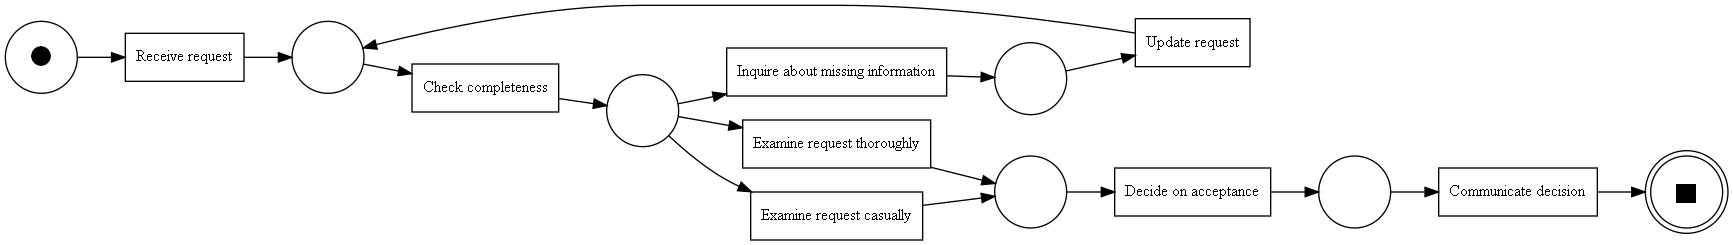

In [2]:
from pm4py.visualization.petri_net import visualizer as pn_visualizer
gviz = pn_visualizer.apply(net, initial_marking, final_marking)
pn_visualizer.view(gviz)

### Low-level process, which reflects the events that are actually recorded.
The relations between high-level activities and low-level event classes is generally n:m. These are as follows:
* <i>Receive request</i> = <i>Open email</i>, <i>Create record</i>
* <i>Check completeness</i> = <i>Open document</i>, <i>Close document</i>, <i>Update record</i>
* <i>Inquire about missing information</i> = <i>Send email</i>
* <i>Update request</i> = <i>Update record</i>
* <i>Examine request thoroughly</i> = <i>Open document</i>, <i>Close document</i>, <i>Query record</i>
* <i>Examine request casually</i> = <i>Query record</i>
* <i>Decide on acceptance</i> = <i>Open document</i>, <i>Close document</i>, <i>Update record</i>
* <i>Communicate decision</i> = <i>Send email</i>


In [3]:
net = PetriNet("HandleRequest_LowLevel")

source = PetriNet.Place("Start")
net.places.add(source)
lt_1 = PetriNet.Transition("name_0", "Open email")
net.transitions.add(lt_1)
petri_utils.add_arc_from_to(source, lt_1, net)

lp_1 = PetriNet.Place("p_1")
net.places.add(lp_1)
petri_utils.add_arc_from_to(lt_1, lp_1, net)


lt_2 = PetriNet.Transition("name_2", "Create record")
net.transitions.add(lt_2)
petri_utils.add_arc_from_to(lp_1, lt_2, net)

lp_3 = PetriNet.Place("p_3")
net.places.add(lp_3)
petri_utils.add_arc_from_to(lt_2, lp_3, net)

# Check completeness
lt_3 = PetriNet.Transition("silent_1", None)
net.transitions.add(lt_3)
petri_utils.add_arc_from_to(lp_3, lt_3, net)

lp_4 = PetriNet.Place("p_4")
net.places.add(lp_4)
petri_utils.add_arc_from_to(lt_3, lp_4, net)

lp_5 = PetriNet.Place("p_5")
net.places.add(lp_5)

lp_6 = PetriNet.Place("p_6")
net.places.add(lp_6)
petri_utils.add_arc_from_to(lt_3, lp_6, net)

lt_4 = PetriNet.Transition("name_4", "Open document")
net.transitions.add(lt_4)
petri_utils.add_arc_from_to(lp_4, lt_4, net)

lt_5 = PetriNet.Transition("name_5", "Close document")
net.transitions.add(lt_5)
petri_utils.add_arc_from_to(lt_4, lp_5, net)
petri_utils.add_arc_from_to(lp_5, lt_5, net)

lt_6 = PetriNet.Transition("name_6", "Update record")
net.transitions.add(lt_6)
petri_utils.add_arc_from_to(lp_6, lt_6, net)

lp_7 = PetriNet.Place("p_7")
net.places.add(lp_7)
petri_utils.add_arc_from_to(lt_5, lp_7, net)

#lp_8 = PetriNet.Place("p_8")
#net.places.add(lp_8)
#petri_utils.add_arc_from_to(lt_5, lp_8, net)

lp_9 = PetriNet.Place("p_9")
net.places.add(lp_9)
petri_utils.add_arc_from_to(lt_6, lp_9, net)

lt_7 = PetriNet.Transition("silent_2", None)
net.transitions.add(lt_7)
petri_utils.add_arc_from_to(lp_7, lt_7, net)
#petri_utils.add_arc_from_to(lp_8, lt_7, net)
petri_utils.add_arc_from_to(lp_9, lt_7, net)

lp_10 = PetriNet.Place("p_10")
net.places.add(lp_10)
petri_utils.add_arc_from_to(lt_7, lp_10, net)

# Examine request thoroughly
lt_8 = PetriNet.Transition("silent_3", None)
net.transitions.add(lt_8)
petri_utils.add_arc_from_to(lp_10, lt_8, net)

lp_11 = PetriNet.Place("p_11")
net.places.add(lp_11)
petri_utils.add_arc_from_to(lt_8, lp_11, net)

lp_12 = PetriNet.Place("p_12")
net.places.add(lp_12)


lp_13 = PetriNet.Place("p_13")
net.places.add(lp_13)
petri_utils.add_arc_from_to(lt_8, lp_13, net)

lt_9 = PetriNet.Transition("name_7", "Open document")
net.transitions.add(lt_9)
petri_utils.add_arc_from_to(lp_11, lt_9, net)

lt_10 = PetriNet.Transition("name_8", "Close document")
net.transitions.add(lt_10)
petri_utils.add_arc_from_to(lp_12, lt_10, net)
petri_utils.add_arc_from_to(lt_9, lp_12, net)

lt_11 = PetriNet.Transition("name_9", "Query record")
net.transitions.add(lt_11)
petri_utils.add_arc_from_to(lp_13, lt_11, net)

#lp_14 = PetriNet.Place("p_14")
#net.places.add(lp_14)
#petri_utils.add_arc_from_to(lt_9, lp_14, net)

lp_15 = PetriNet.Place("p_15")
net.places.add(lp_15)
petri_utils.add_arc_from_to(lt_10, lp_15, net)

lp_16 = PetriNet.Place("p_16")
net.places.add(lp_16)
petri_utils.add_arc_from_to(lt_11, lp_16, net)

lt_12 = PetriNet.Transition("silent_3", None)
net.transitions.add(lt_12)
#petri_utils.add_arc_from_to(lp_14, lt_12, net)
petri_utils.add_arc_from_to(lp_15, lt_12, net)
petri_utils.add_arc_from_to(lp_16, lt_12, net)

lp_15_9 = PetriNet.Place("p_15_9")
net.places.add(lp_15_9)
petri_utils.add_arc_from_to(lt_12, lp_15_9, net)

#lt_13_9 = PetriNet.Transition("name_10_8", "Update record")
lt_13_9 = PetriNet.Transition("name_10_9", "Update record")
net.transitions.add(lt_13_9)
petri_utils.add_arc_from_to(lp_15_9, lt_13_9, net)

# Examine request casually
lt_13 = PetriNet.Transition("name_10", "Query record")
net.transitions.add(lt_13)
petri_utils.add_arc_from_to(lp_10, lt_13, net)

lp_16_8 = PetriNet.Place("p_16_8")
net.places.add(lp_16_8)
petri_utils.add_arc_from_to(lt_13, lp_16_8, net)

lt_13_8 = PetriNet.Transition("name_10_8", "Update record")
net.transitions.add(lt_13_8)
petri_utils.add_arc_from_to(lp_16_8, lt_13_8, net)

# Loop back
# inquire missing info


# lt_13_5 = PetriNet.Transition("name_13_5", "Generate document")
# net.transitions.add(lt_13_5)
# petri_utils.add_arc_from_to(lp_10, lt_13_5, net)
#
# lp_16_5 = PetriNet.Place("lp_16_5")
# net.places.add(lp_16_5)
# petri_utils.add_arc_from_to(lt_13_5, lp_16_5, net)

lt_14 = PetriNet.Transition("name_11", "Send email")
net.transitions.add(lt_14)
petri_utils.add_arc_from_to(lp_10, lt_14, net)

lp_17 = PetriNet.Place("p_17")
net.places.add(lp_17)
petri_utils.add_arc_from_to(lt_14, lp_17, net)

# update request
lt_15_1 = PetriNet.Transition("name_12_1", "Open email")
net.transitions.add(lt_15_1)
petri_utils.add_arc_from_to(lp_17, lt_15_1, net)

lp_17_1 = PetriNet.Place("p_17_1")
net.places.add(lp_17_1)
petri_utils.add_arc_from_to(lt_15_1, lp_17_1, net)

lt_15 = PetriNet.Transition("name_12", "Update record")
net.transitions.add(lt_15)
petri_utils.add_arc_from_to(lp_17_1, lt_15, net)

petri_utils.add_arc_from_to(lt_15, lp_3, net)


lp_join_1 = PetriNet.Place("p_join_1")
net.places.add(lp_join_1)
petri_utils.add_arc_from_to(lt_13_8, lp_join_1, net)
petri_utils.add_arc_from_to(lt_13_9, lp_join_1, net)


# Decide on acceptance
lt_16 = PetriNet.Transition("silent_4", None)
net.transitions.add(lt_16)
petri_utils.add_arc_from_to(lp_join_1, lt_16, net)

lp_18 = PetriNet.Place("p_18")
net.places.add(lp_18)
petri_utils.add_arc_from_to(lt_16, lp_18, net)

lp_19 = PetriNet.Place("p_19")
net.places.add(lp_19)


lp_20 = PetriNet.Place("p_20")
net.places.add(lp_20)
petri_utils.add_arc_from_to(lt_16, lp_20, net)

lt_17 = PetriNet.Transition("name_13", "Open document")
net.transitions.add(lt_17)
petri_utils.add_arc_from_to(lp_18, lt_17, net)

lt_18 = PetriNet.Transition("name_14", "Close document")
net.transitions.add(lt_18)
petri_utils.add_arc_from_to(lp_19, lt_18, net)
petri_utils.add_arc_from_to(lt_17, lp_19, net)

lt_19 = PetriNet.Transition("name_15", "Update record")
net.transitions.add(lt_19)
petri_utils.add_arc_from_to(lp_20, lt_19, net)

#lp_21 = PetriNet.Place("p_21")
#net.places.add(lp_21)
#petri_utils.add_arc_from_to(lt_17, lp_21, net)

lp_22 = PetriNet.Place("p_22")
net.places.add(lp_22)
petri_utils.add_arc_from_to(lt_18, lp_22, net)

lp_23 = PetriNet.Place("p_23")
net.places.add(lp_23)
petri_utils.add_arc_from_to(lt_19, lp_23, net)

lt_20 = PetriNet.Transition("silent_5", None)
net.transitions.add(lt_20)
#petri_utils.add_arc_from_to(lp_21, lt_20, net)
petri_utils.add_arc_from_to(lp_22, lt_20, net)
petri_utils.add_arc_from_to(lp_23, lt_20, net)

lp_23_5 = PetriNet.Place("lp_23_5")
net.places.add(lp_23_5)
petri_utils.add_arc_from_to(lt_20, lp_23_5, net)

# Communicate decision
lt_20_5 = PetriNet.Transition("name_16_5", "Query record")
net.transitions.add(lt_20_5)
petri_utils.add_arc_from_to(lp_23_5, lt_20_5, net)

lp_24 = PetriNet.Place("p_24")
net.places.add(lp_24)
petri_utils.add_arc_from_to(lt_20_5, lp_24, net)

lt_20_7 = PetriNet.Transition("name_16_7", "Generate document")
net.transitions.add(lt_20_7)
petri_utils.add_arc_from_to(lp_24, lt_20_7, net)

lp_24_5 = PetriNet.Place("p_24_5")
net.places.add(lp_24_5)
petri_utils.add_arc_from_to(lt_20_7, lp_24_5, net)

lt_21 = PetriNet.Transition("name_16", "Send email")
net.transitions.add(lt_21)
petri_utils.add_arc_from_to(lp_24_5, lt_21, net)

sink = PetriNet.Place("End")
net.places.add(sink)
petri_utils.add_arc_from_to(lt_21, sink, net)

# Adding tokens
initial_marking = Marking()
initial_marking[source] = 1
final_marking = Marking()
final_marking[sink] = 1

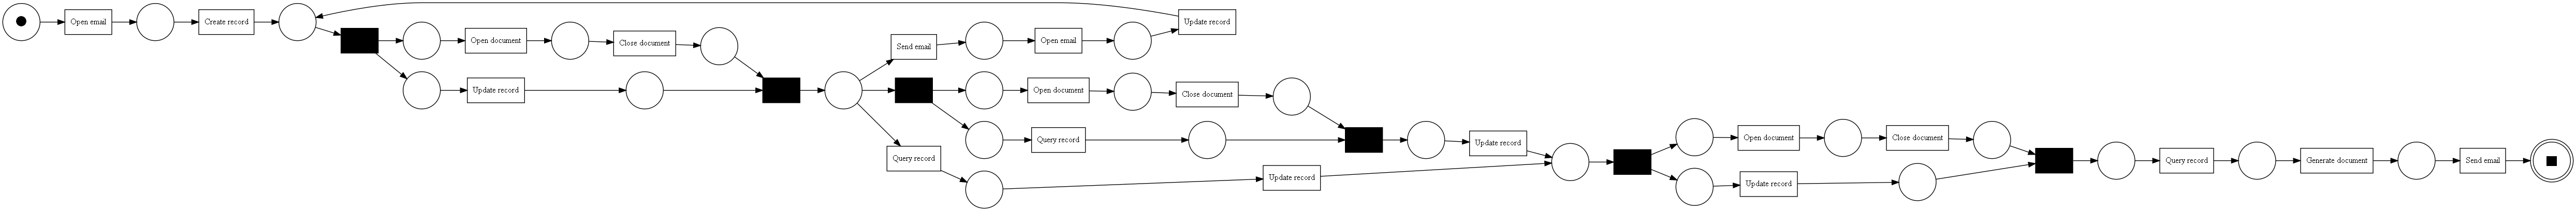

In [4]:
from pm4py.visualization.petri_net import visualizer as pn_visualizer
gviz = pn_visualizer.apply(net, initial_marking, final_marking)
pn_visualizer.view(gviz)

### Simulation  
Build a reachability graph from the low-level model

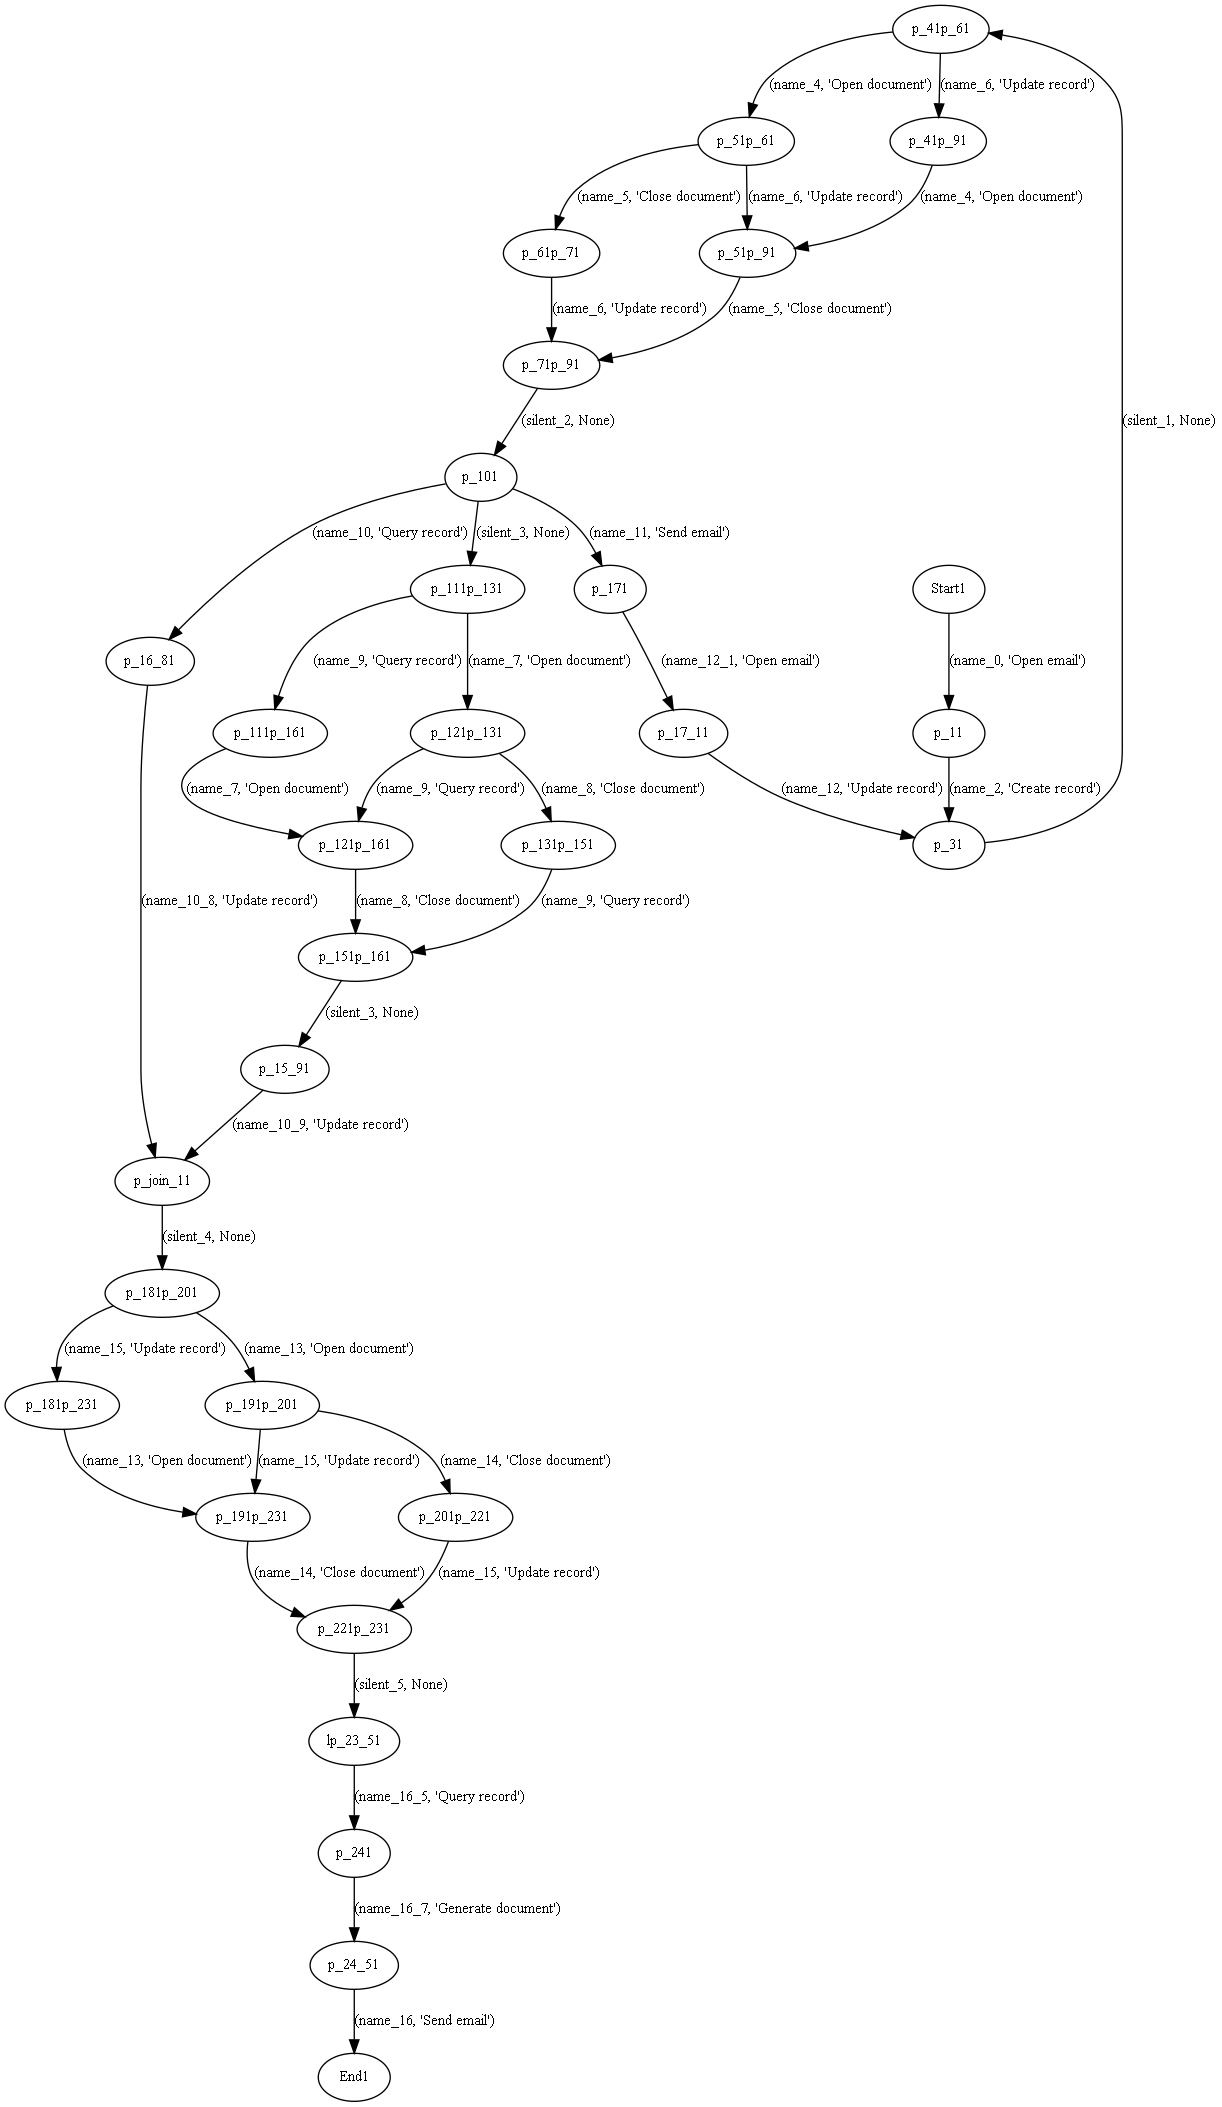

In [5]:
#Reachability Graph 
from pm4py.objects.petri_net.utils import reachability_graph
from pm4py.visualization.transition_system import visualizer as rg_visualizer
rg = reachability_graph.construct_reachability_graph(net, initial_marking)
gviz1 = rg_visualizer.apply(rg)
rg_visualizer.view(gviz1)


### Build Activity Objects


In [6]:
from simulation.model import Model
from simulation.abstraction_activity import High_level_activity, Low_level_Activity

model = Model()

# only not silent activities
# low-levelactivty: lactx = Activity(low-level-transition in petri net, role, duration, model)
# high-level-activity: acty = High_level_activity(high-level-transition in petri net, role, list of low-level-activties, waiting-time, distribution for waiting time)

#receive request
lact1 = Low_level_Activity(transition=lt_1, organizational_unit="Assistant", time=(10, 10, 10), model=model)
lact2 = Low_level_Activity(transition=lt_2, organizational_unit="Assistant", time=(290, 290, 290), model=model)
act1 = High_level_activity(transition=t_a, organizational_unit="Assistant", low_level_acitvities=[lact1, lact2], waiting_time=None, waiting_time_distribution=None) # no waiting time before first even in case

#check completness
lact3 = Low_level_Activity(transition=lt_4, organizational_unit="Assistant", time=(7, 10, 30), model=model)
lact4 = Low_level_Activity(transition=lt_5, organizational_unit="Assistant", time=(7, 10, 30), model=model)
lact5 = Low_level_Activity(transition=lt_6, organizational_unit="Assistant", time=(480, 780, 1140), model=model) #(8 min, 13 min, 19 min)
act2 = High_level_activity(transition=t_2, organizational_unit="Assistant", low_level_acitvities=[lact3, lact4, lact5], waiting_time=(3600, 4200, 7200), waiting_time_distribution="triangular")

#Examine thoroughly
lact6 = Low_level_Activity(transition=lt_9, organizational_unit="Expert", time=(7, 10, 30), model=model)
lact7 = Low_level_Activity(transition=lt_10, organizational_unit="Expert", time=(7, 10, 30), model=model)
lact8 = Low_level_Activity(transition=lt_11, organizational_unit="Expert", time=(780, 1020, 1320), model=model) #(13 min, 17 min, 22 min)
lact8_1 = Low_level_Activity(transition=lt_13_9, organizational_unit="Expert", time=(120, 300, 420), model=model) #(2 min, 5 min, 7 min)
act3 = High_level_activity(transition=t_3, organizational_unit="Expert", low_level_acitvities=[lact6, lact7, lact8, lact8_1], waiting_time=(3600, 4200, 7200), waiting_time_distribution="triangular")

#Examine casually
lact9 = Low_level_Activity(transition=lt_13, organizational_unit="Assistant", time=(30, 120, 180), model=model) #(30sek, 2 min, 3 min)
lact9_1 = Low_level_Activity(transition=lt_13_8, organizational_unit="Assistant", time=(120, 300, 420), model=model) #(2 min, 5 min, 7 min)
act4 = High_level_activity(transition=t_4, organizational_unit="Assistant", low_level_acitvities=[lact9, lact9_1], waiting_time=(3600, 4200, 7200), waiting_time_distribution="triangular")

#Inquiry about missing information
lact10 = Low_level_Activity(transition=lt_14, organizational_unit="Assistant", time=(60, 180, 360), model=model)  #(1 in, 3 min, 6 min)
act5 = High_level_activity(transition=t_9, organizational_unit="Assistant", low_level_acitvities=[lact10], waiting_time=(300, 600, 1200), waiting_time_distribution="triangular") #(5 min, 10 min, 20 min)

#Update request
lact11 = Low_level_Activity(transition=lt_15, organizational_unit="Assistant", time=(10, 10, 10), model=model)
lact11_1 = Low_level_Activity(transition=lt_15_1, organizational_unit="Assistant", time=(290, 290, 290), model=model) #(5 min - 10 sek)
act6 = High_level_activity(transition=t_1, organizational_unit="Assistant", low_level_acitvities=[lact11, lact11_1], waiting_time=(18000), waiting_time_distribution="exponential") #5h

#Decide on acceptance
lact12 = Low_level_Activity(transition=lt_17, organizational_unit="Manager", time=(15, 20, 30), model=model)
lact13 = Low_level_Activity(transition=lt_18, organizational_unit="Manager", time=(3, 10, 30), model=model)
lact14 = Low_level_Activity(transition=lt_19, organizational_unit="Manager", time=(480, 780, 1140), model=model)  #(8 min, 13 min, 19 min)
act7 = High_level_activity(transition=t_5, organizational_unit="Manager", low_level_acitvities=[lact12, lact13, lact14], waiting_time=(3600, 4200, 7200), waiting_time_distribution="triangular")

#Comunicate decision
lact15 = Low_level_Activity(transition=lt_21, organizational_unit="Assistant", time=(10, 30, 60), model=model)
lact16 = Low_level_Activity(transition=lt_20_5, organizational_unit="Assistant", time=(30, 120, 150), model=model)  #(30sek, 2 min, 2.5 min)
lact17 = Low_level_Activity(transition=lt_20_7, organizational_unit="Assistant", time=(120, 300, 390), model=model)   #(2 min, 5 min, 6.5 min)
act8 = High_level_activity(transition=t_6, organizational_unit="Assistant", low_level_acitvities=[lact15, lact16, lact17], waiting_time=(3600, 4200, 7200), waiting_time_distribution="triangular")

#### Build machine  
First you need to extract the transitions and places from the reachability graph. Based on that the state based machine can be initialized. Futhermore a model class is needed providing all necessary information for the model. 

In [7]:
from transitions import Machine
machine = Machine(model,
                  states = model.get_list_states(net, initial_marking),
                  transitions = model.get_list_transitions(net, initial_marking),
                  initial='Start1',
                  auto_transitions=False)

# auto_transitions = false verhindert, dass es to_<<state>> methoden gibt

### add Working Schedule

In [8]:
from src.user_schedule import User_schedule
import datetime

#set user schedule
timestamp = datetime.datetime.strptime("03.01.2022 08:00:00", "%d.%m.%Y %H:%M:%S")
#initilize start timestamp for every resource
time_ress = User_schedule(timestamp, model)
#set user_shift depending on the role 
#add_user_shift(role, start, end)
time_ress.add_user_shift(organizational_unit="Assistant", begin="08:00:00", end="16:00:00")
time_ress.add_user_shift(organizational_unit="Expert", begin="08:00:00", end="16:00:00")
time_ress.add_user_shift(organizational_unit="Manager", begin="09:00:00", end="18:00:00")

#set numbers of associates per role
time_ress.set_number_associates_in_organizational_unit(organizational_unit="Assistant", number=20)
time_ress.set_number_associates_in_organizational_unit(organizational_unit="Expert", number=5)
time_ress.set_number_associates_in_organizational_unit(organizational_unit="Manager", number=3)

#intervall of orders
#set_order_intervall(weekday in numbers, waiting time between the start of two cases)
# code for days: 1=monday, 2=tuesday, 3=wednesday, 4=thursday, 5=friday
time_ress.set_order_intervall(day=0, intervall=(1800, 2700, 4500)) #(30 min, 45 min, 1h 15 min)
time_ress.set_order_intervall(day=1, intervall=(1800, 3600, 4500)) #(30 min, 1h, 1h 15 min)
time_ress.set_order_intervall(day=2, intervall=(1800, 3600, 4500)) #(30 min, 1h, 1h 15 min)
time_ress.set_order_intervall(day=3, intervall=(1800, 3600, 4500)) #(30 min, 1h, 1h 15 min)
time_ress.set_order_intervall(day=4, intervall=(1800, 2700, 4500)) #(30 min, 45 min, 1h 15 min)

#### Simulation function

In [10]:
from simulation.simulate import simulate
#simulate(machine, model, user_shift_instance, number of cases, start timestamp, id of the start activity)
traces = simulate(machine=machine, model=model, time_ress=time_ress, n=100, start_time="03.01.2022 08:00:00", start_activity="name_0")

100%|██████████| 100/100 [00:00<00:00, 116.12it/s]


In [11]:
#Transform the list into a pandas data framework
import pandas as pd

pd.set_option('display.max_rows', 3000)
event_log = pd.DataFrame(traces, columns=['case:concept:name', 'concept:name', 'High Level Transition','org:role', 'org:resource', 'time:timestamp:start', 'time:timestamp:end', "isComplete", "isAccepted"])

In [12]:
event_log.head(50)

,case:concept:name,concept:name,High Level Transition,org:role,org:resource,time:timestamp:start,time:timestamp:end,isComplete,isAccepted
0,0,Open email,Receive request,Assistant,Assistant9,2022-01-03 08:00:00,2022-01-03 08:00:10,not complete,None
1,0,Create record,Receive request,Assistant,Assistant9,2022-01-03 08:00:10,2022-01-03 08:05:00,not complete,None
2,0,Open document,Check completeness,Assistant,Assistant15,2022-01-03 09:14:19,2022-01-03 09:14:42,not complete,None
3,0,Close document,Check completeness,Assistant,Assistant15,2022-01-03 09:14:42,2022-01-03 09:15:08,not complete,None
4,0,Update record,Check completeness,Assistant,Assistant15,2022-01-03 09:15:08,2022-01-03 09:25:27,not complete,None
5,0,Send email,Inquire about missing information,Assistant,Assistant5,2022-01-03 09:35:24,2022-01-03 09:38:50,not complete,None
6,0,Open email,Update request,Assistant,Assistant19,2022-01-03 15:35:31,2022-01-03 15:40:21,not complete,None
7,0,Update record,Update request,Assistant,Assistant19,2022-01-03 15:40:21,2022-01-03 15:40:31,not complete,None
8,0,Update record,Check completeness,Assistant,Assistant8,2022-01-04 09:10:56,2022-01-04 09:23:44,complete,None
9,0,Open document,Check completeness,Assistant,Assistant8,2022-01-04 09:23:44,2022-01-04 09:23:53,complete,None


#### Export

In [ ]:
event_log.to_csv('EventLog_LowLevel.csv', sep=";", index=False)